# Visualización de datos en R

#### Basados en las notas de Guy Lebanon 
Nada realmente cuenta mejor, una historia acerca de  datos, como buenos gráficos. Los gráficos capturan información de los datos mucho mejor que los resumenes  estadísticos y  a menudo muestran características  o patrones dificiles de extraer, de lo  que pueden hacer los resúmenes.

R tiene herramientas muy potentes para visualizar datos. Existen cierto número de  paquetes diferentes para visualizar datos y por lo general no son particularmente compatibles, por lo que no pueden combinarse fácilmente. 

Exploramos en este cuaderno, diferentes tipos de gráficos, utilizando dos paquetes de gráficos de R: `graphics`  y `ggplot2`. El paquete `graphics` contiene las funciones de gráficos R básicas y se instala y se carga en el entorno de trabajo de forma predeterminada. Sus funciones son fáciles de usar y producen una variedad de gráficos útiles.

El paquete `ggplot2` proporciona una funcionalidad gráfica alternativa basada en la [gramática gráfica de Wilkinson](http://vita.had.co.nz/papers/layered-grammar.pdf).

Para instalar este paquete y llevarlo al entorno de trabajo, se escribe los siguientes comandos: 

```

install.packages("ggplot2")
library(ggplot2)
```

La sintaxis de `ggplot2` es considerablemente más simple que la sintaxis del paquete `graphics` y los gráficos resultantes cuentan con una selección más cuidadosa de los valores por defecto, como las escalas de ejes y la posición de la leyenda. La principal desventaja del paquete `ggplot2` es que se necesita más tiempo para representar los gráficos.

In [1]:
library(graphics)

Puede utilizarse la función `library `  para obtener una lista de las funciones implementadas en el paquete `graphics`:

In [2]:
library(help = "graphics")

Sin embargo, esta lista no es exhaustiva, ya que la función principal, `plot()`, es genérica. Esta función es  llamada función genérica, ya  que lo que hace depende de la entrada que recibe. Así que puedes darle diferentes argumentos para obtener gráficos de varios objetos. En cualquier caso, se crean gráficos básicos mediante la función `plot()`. 

El gráfico más simple que puede hacer es un diagrama de dispersión, que traza puntos para los valores `x` e `y` en el plano bidimensional, como se muestra en la siguiente figura:

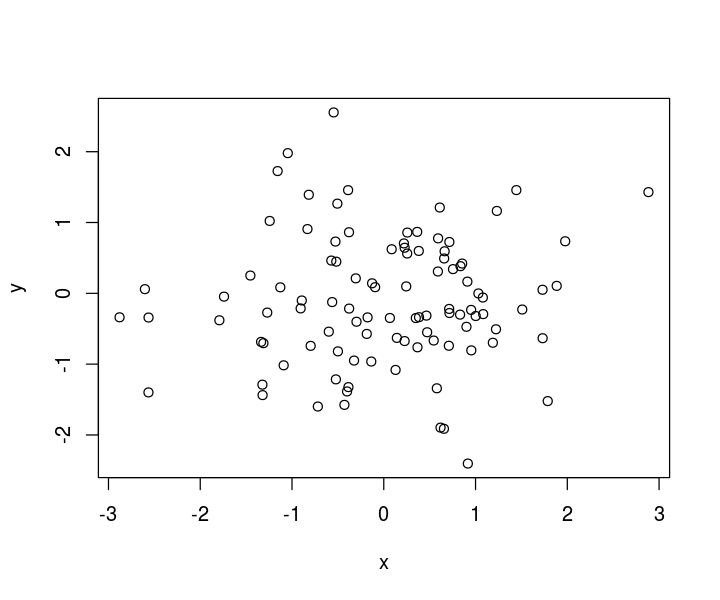

In [4]:
options(repr.plot.width=6, repr.plot.height=5)

x <- rnorm(100)
y <- rnorm(100)
plot(x, y)

Utilizamos tres conjuntos de datos para explorar los  gráficos utilizando  los paquetes `graphics` y `ggplot2`. El primero es el dataframe `faithful` que forma parte del paquete `datasets` que se instala y carga de forma predeterminada. El data frame `faithful` tiene dos variables: tiempo de erupción y tiempo de espera para la siguiente erupción (ambos en minutos) del géiser Old Faithful en el Parque Nacional de Yellowstone, Wyoming, EE.UU.

In [5]:
names(faithful) # nombre de las variables

[1] "eruptions" "waiting"

In [6]:
summary(faithful) # resumen de las variables

   eruptions        waiting    
 Min.   :1.600   Min.   :43.0  
 1st Qu.:2.163   1st Qu.:58.0  
 Median :4.000   Median :76.0  
 Mean   :3.488   Mean   :70.9  
 3rd Qu.:4.454   3rd Qu.:82.0  
 Max.   :5.100   Max.   :96.0  

El segundo conjunto de datos, `mtcars`, es también una parte del paquete de `datasets`. Contiene información sobre varios modelos de automóviles extraídos de la revista 1974 Motor Trend. Las variables incluyen el nombre del modelo, el peso, la potencia, la efciencia del combustible y el tipo de transmisión.

In [7]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

El tercer conjunto de datos, `mpg`, es parte del paquete `ggplot2`. Es similar a `mtcars`, ya  que contiene la economía de combustible y otros atributos, pero es más grande y contiene nuevos modelos de automóviles extraídos de la página web http://fueleconomy.gov.

In [8]:
library(ggplot2)
names(mpg)

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

## Los paquetes graphics y ggplot2

El paquete `graphics` contiene dos tipos de funciones: funciones de alto nivel y funciones de bajo nivel. Las funciones de alto nivel producen los gráficos mientras que las funciones de bajo nivel modifican un gráfico existente. La función `plot` es la función principal de alto nivel. Toma como argumentos una o más columnas de datos que representan datos y otros argumentos que modifican su comportamiento predeterminado.

Otras funciones de alto nivel en el paquete `graphics` son más especializadas y producen un tipo específico de gráfico, como `hist` (para producir histogramas) o `curve` (para producir curvas).  Ejemplos de funciones de bajo nivel en el paquete de gráficos son:

* `title`, agrega o modifica etiquetas de título y ejes.
* `grid`, agrega una cuadrícula a la actual figura.
* `legend `, muestra una leyenda que conecta símbolos, colores o tipos de líneas a cadenas descriptivas.
* `lines` añade un gráfico de líneas a un gráfico existente.

Las dos funciones principales del paquete ggplot2 son: `qplot` y `ggplot`.

La función `qplot` acepta como argumentos una o más variables de datos asignadas a las variables `x`, `y`, `z` (en algunos casos sólo se especifican uno o dos de estos argumentos). La función más compleja `ggplot` acepta como argumentos un dataframe y un objeto devuelto por la función `aes` que acepta variables de datos como argumentos. En contraste con `qplot`, `ggplot` no crea un gráfico. En su lugar, devuelve un objeto que se puede modificar añadiendo capas a él mediante el operador `+`. Una vez que se hayan añadido las capas adecuadas, el objeto puede guardarse en el disco o imprimirse utilizando la función `print`. La funcionalidad de adición de capas se aplica también a `qplot`.

El paquete `ggplot2` proporciona etiquetado automático de ejes y leyendas. Para aprovechar esta característica, los datos deben residir en un data frame con nombres de columnas. Se hace hincapié en este enfoque, ya que proporciona más datos informativos como nombres de columna de datos, además de simplificar el código R.



La manera más simple de graficar datos numéricos unidimensionales es representarlos como puntos en un espacio bidimensional, con una coordenada correspondiente al índice del punto de datos y la otra coordenada correspondiente a su valor. Por ejemplo:

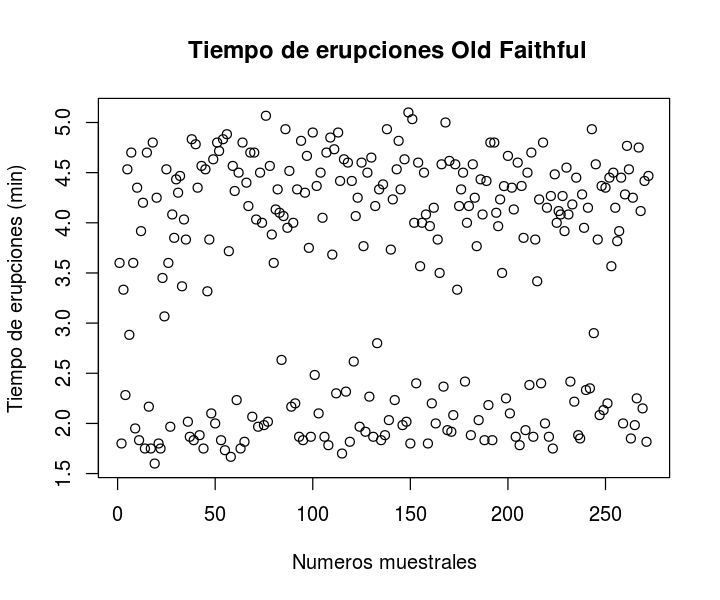

In [9]:
options(repr.plot.width=6, repr.plot.height=5)

plot(faithful$eruptions, xlab = "Numeros muestrales", ylab = "Tiempo de erupciones (min)",
     main = " Tiempo de erupciones Old Faithful")

Concluimos de la figura anterior que Old Faithful tiene dos tiempos típicos de erupción: un largo tiempo de erupción alrededor de 4,5 minutos y un corto tiempo de erupción alrededor de 1,5 minutos. También el orden en el que se almacenan las filas de datos no está relacionado con la variable de erupción.

### Histogramas

Una forma alternativa de graficar datos numéricos unidimensionales es usar un  histograma. Un histograma divide el rango de valores numéricos en intervalos y muestra el número de valores de datos que caen dentro de cada intervalo.

El ancho de los intervalos influye en el nivel de detalles. Los intervalos muy estrechos mantienen toda la información, pero son difíciles de sacar conclusiones, ya que el histograma, llega a ser  equivalente a una lista ordenada de valores de datos. Los intervalos muy anchos pierden información debido al suavizado excesivo. Un buen ancho de un intervalo  equilibra la pérdida de información con la agregación de datos útiles. A diferencia de los gráficos anteriores que contienen toda la información original, los histogramas descartan el orden de los puntos de datos y trata las muestras en el mismo intervalo como idénticas.

La función `hist` dentro del paquete de `graphics` se puede utilizar para mostrar un histograma. Ver `help(hist)` para más detalles sobre los diferentes parámetros y en particular para el control de la anchura de los intervalos.

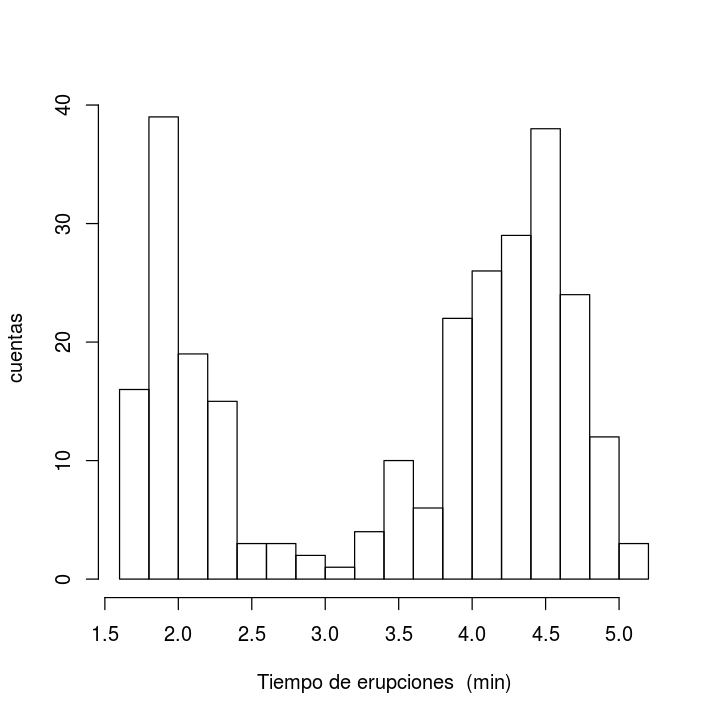

In [10]:
# Dibujamos un histograma con 20 intervalos 

options(repr.plot.width=6, repr.plot.height=6)
hist(faithful$eruptions, breaks = 20, xlab = "Tiempo de erupciones  (min)", ylab = "cuentas", main = "")

Para graficar un histograma con el paquete `ggplot2`, usamos la función `qplot` con dos parámetros: una columna de data frame (asignada al argumento `x`) y un nombre de la variable del data frame (asignada al argumento `data`). Los dos ejes se etiquetan automáticamente basándose en los nombres de las variables que representan.

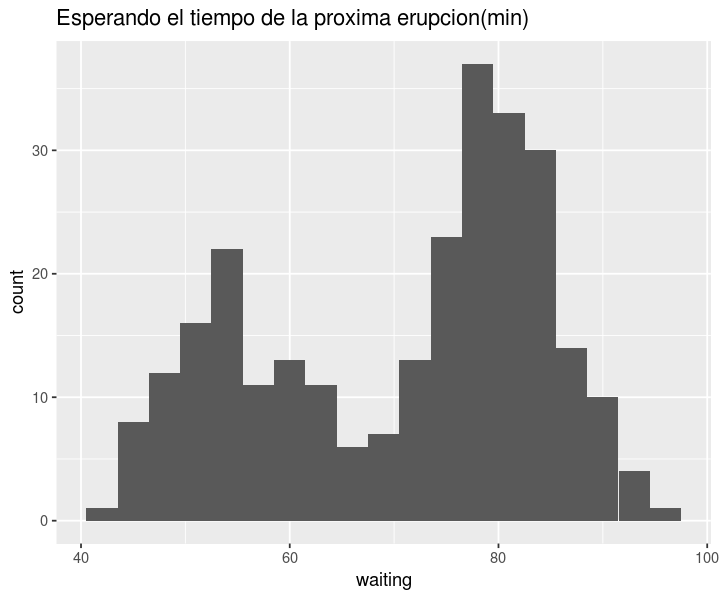

In [11]:
options(repr.plot.width=6, repr.plot.height=5)
qplot(x = waiting, data = faithful, binwidth = 3, main = "Esperando el tiempo de la proxima erupcion(min)")

Para crear un histograma con la función `ggplot`, pasamos un objeto devuelto por la función `aes` y añadimos una capa de la  geometría de histograma usando el operador `+`.

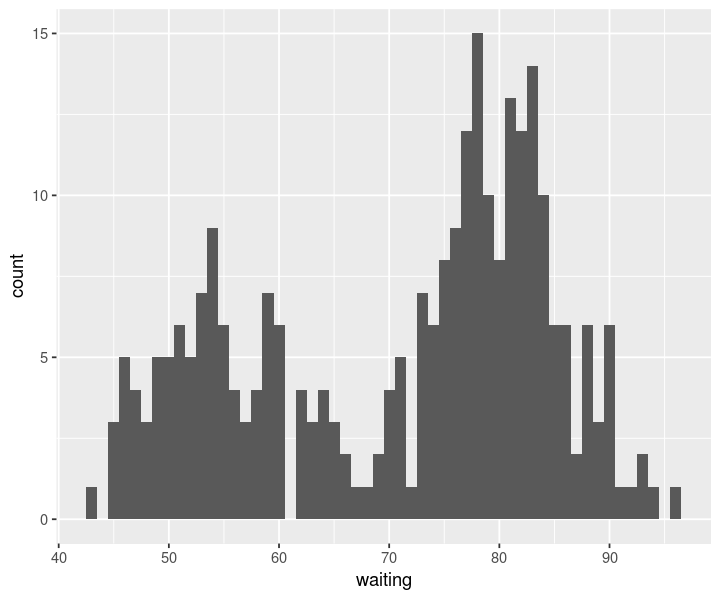

In [12]:
options(repr.plot.width=6, repr.plot.height=5)
ggplot(faithful, aes(x = waiting)) + geom_histogram(binwidth =1)

## Suavizado de histogramas

Denotamos $n$ puntos como $x^{(1)}, \dots, x^{(n)}$, un histograma suavizado es la siguiente función $f_h: \mathbb{R} \rightarrow \mathbb{R_{+}}$:

$$
f_h(x) = \frac{1}{n}\sum_{i =1}^{n}K_h(x -x^{(i)})
$$


donde la función kernel  $K_h:\mathbb{R} \rightarrow \mathbb{R}$, alcanza, su máximo en `0` y decrece, cuando $\vert x -x^{(i)}\vert $ crece. También asumimos que la función kernel se integra a uno $\int K_h(x)dx = 1$ y satisface la relación:

$$
K_h(r) = h^{-1}K_1(r/h).
$$

Referimos a $K_1$ como la forma base del kernel y se denota como $K$. Existen  cuatro importantes funciones kernels son:

$$
K(r) = (1 -\vert r\vert^3)^3\cdot1_{\{\vert r \vert < |\}}\qquad  (Tricubo)\\
K(r) = (1 -\vert r\vert)^\cdot1_{\{\vert r \vert < |\}}\qquad  (Triangular)\\
K(r) = 2^{-1}\cdot1_{\{\vert r \vert < |\}} \qquad (Uniforme)\\
K(r) = \exp(-x^2/2)/\sqrt{2\pi}\qquad (Gaussiano)
$$

La razón de suavizar un histograma, se debe a que generalmente, se trabaja con muestras, por lo que el histograma es solamente una representación aproximada de la población, que en el límite, cuando la amplitud de los intervalos tiende a `0`, será una línea curva sin cambios bruscos. Por lo que al realizar el suavizado del histograma estamos simulando el límite.

El siguiente código R muestra estos kernel para `h = 1` y `h = 2`. Debes observar cómo el kernel que corresponde a `h = 2` es el doble de ancho que los  correspondientes a h = 1. La técnica utilizada para mostrar múltiples paneles en el mismo gráfico es llamada `faceting`.

In [14]:
# Funciones kernel habituales

x = seq(-3, 3, length.out = 100)
K1 = function(x) {
    ind = abs(x) > 1
    x = x * 0 + 1/2
    x[ind] = 0
    return(x)
}

K2 = function(x) {
    ind = abs(x) > 1
    x = 1 - abs(x)
    x[ind] = 0
    return(x)
}

K3 = function(x) dnorm(x)
K4 = function(x) {
    ind = abs(x) > 1
    x = (1 - abs(x)^3)^3
    x[ind] = 0
    return(x)
}
R = stack(list(uniforme = K1(x), triangular = K2(x), gaussiano = K3(x), tricubo = K4(x), uniforme = K1(x/2)/2,
               triangular = K2(x/2)/2, gaussiano = K3(x/2)/2, tricubo = K4(x/2)/2))
head(R) # primera seis lineas
    

values,ind
0,uniforme
0,uniforme
0,uniforme
0,uniforme
0,uniforme
0,uniforme


In [15]:
names(R) = c("kernel.value", "kernel.type")
R$x = x
R$h[1:400] = "h=1"
R$h[401:800] = "h=2"
head(R)

kernel.value,kernel.type,x,h
0,uniforme,-3.000000,h=1
0,uniforme,-2.939394,h=1
0,uniforme,-2.878788,h=1
0,uniforme,-2.818182,h=1
0,uniforme,-2.757576,h=1
0,uniforme,-2.696970,h=1


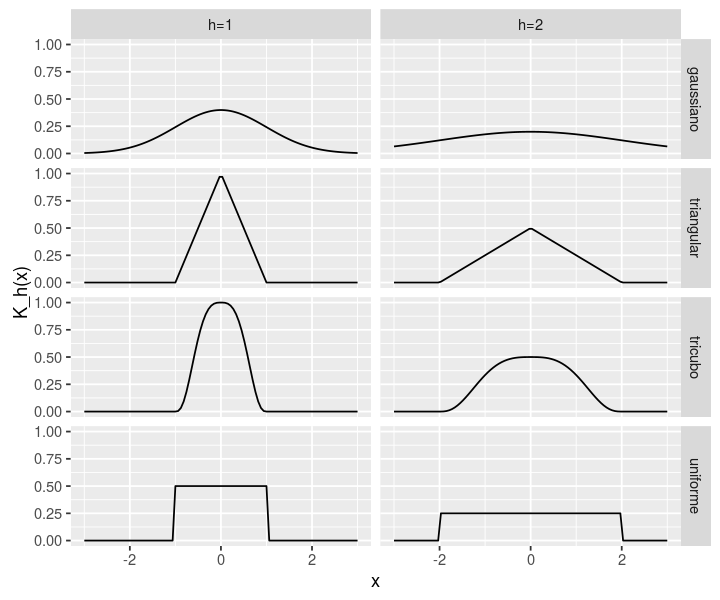

In [16]:
qplot(x, kernel.value, data = R, facets = kernel.type ~h, geom = "line", xlab = "x", ylab = "K_h(x)")

Identificando las funciones $g_i(x) = K_h(x -x^{(i)})$ vemos que $f_h$ es una media de las funciones $g_i, i = 1,\dots, n$. Desde que las funciones $g_i(x)$ son centradas en $x^{(i)}$ y disminuye con la distancia entre $x$ y $x^{(i)}$, su promedio $f_h$ será alto en áreas que contienen muchos puntos de datos y bajo en áreas que contienen  pocos puntos de datos. El rol del denominador `n` es asegurar que la integral de $f_h$ es $1$, haciendo de $f_h$ un estimador formal de la distribución subyacente.

El código R a continuación muestra gráficamente el histograma suavizado de los datos `1, 0, 0.5, 1, 2, 5, 5.5, 6`, usando el Kernel Gaussiano. Los gráficos muestran $f_h$ como una línea sólida continua y las funciones $g_i$  como líneas discontinuas (reducido a escala, por un factor de 2 para evitar la superposición de líneas sólidas y discontinuas).

En el primer gráfico a continuación, el valor de `h` es relativamente pequeño `(h = 1/6)`, dando como resultado una función  $f_h$ próximo a una secuencia de picos  centrados en los puntos de datos. En el segundo gráfico `h` es mayor `(h = 1/3)` mostrando una forma multimodal que es significativamente diferente del primer caso. En el tercer caso, `h` es relativamente grande `(h = 1)`, resultando en una función $f_h$ que se asemeja a dos componentes principales. Para `h` más grande, la función $f_h$ se asemejará a una única forma unimodal.

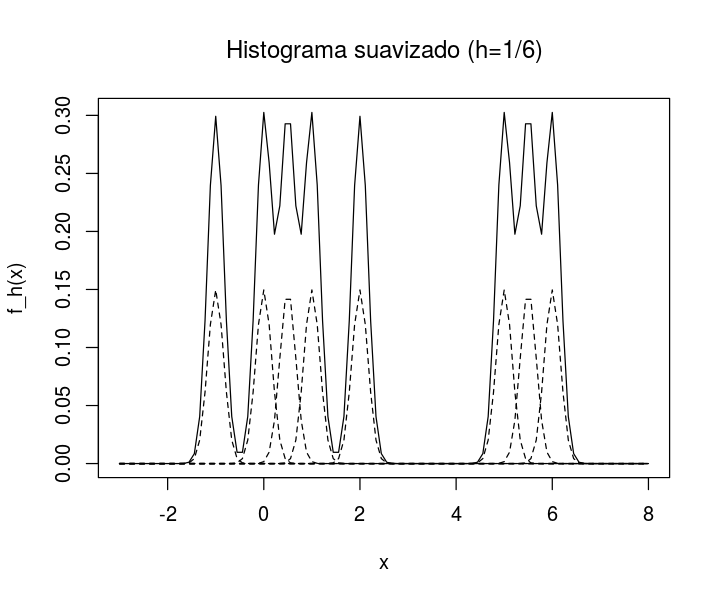

In [17]:
options(repr.plot.width=6, repr.plot.height=5)

A = c(-1, 0, 0.5, 1, 2, 5, 5.5, 6)
x = seq(-3, 8, length.out = 100)
D = x %o% rep(1, 8)
f = x * 0
for (i in 1:8) {
    D[, i] = dnorm(x, A[i], 1/6)/8
    f = f + D[, i]
}
plot(x, f, xlab = "x", ylab = "f_h(x)", type = "l")
for (i in 1:8) lines(x, D[, i]/2, lty = 2)
title("Histograma suavizado (h=1/6)", font.main = 1)

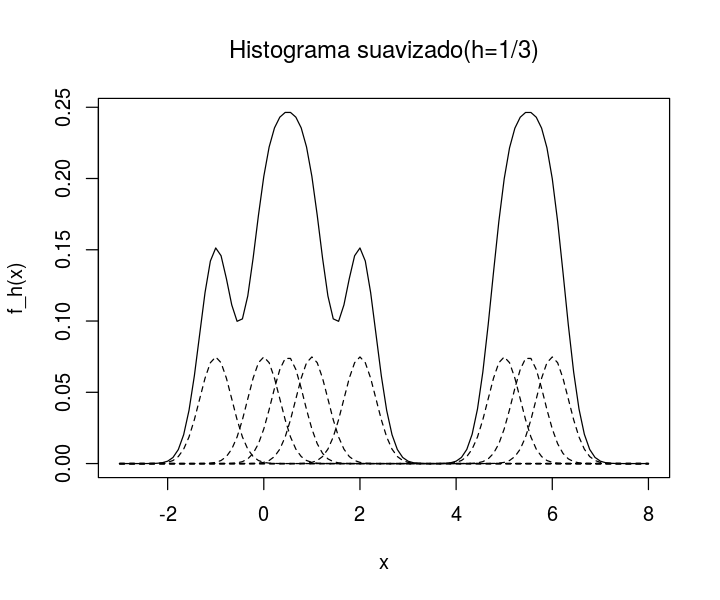

In [18]:
A = c(-1, 0, 0.5, 1, 2, 5, 5.5, 6)
x = seq(-3, 8, length.out = 100)
D = x %o% rep(1, 8)
f = x * 0
for (i in 1:8) {
    D[, i] = dnorm(x, A[i], 1/3)/8
    f = f + D[, i]
}
plot(x, f, xlab = "x", ylab = "f_h(x)", type = "l")
for (i in 1:8) lines(x, D[, i]/2, lty = 2)
title("Histograma suavizado(h=1/3)", font.main = 1)

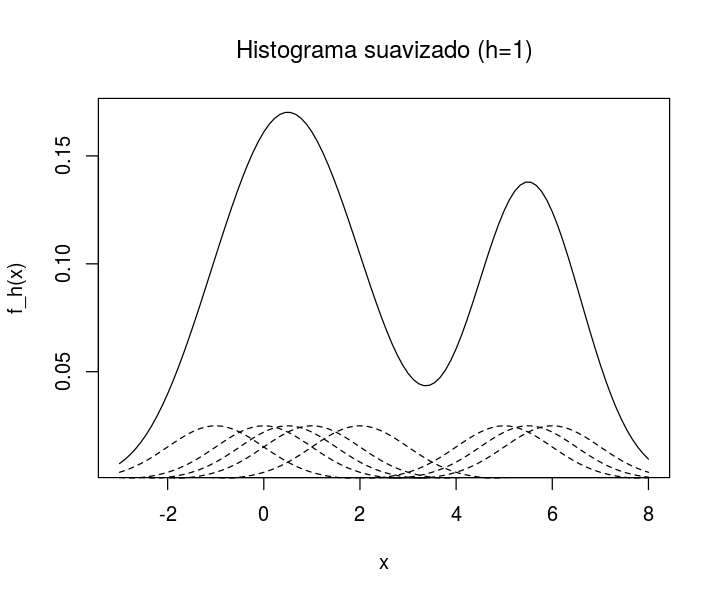

In [19]:
A = c(-1, 0, 0.5, 1, 2, 5, 5.5, 6)
x = seq(-3, 8, length.out = 100)
D = x %o% rep(1, 8)
f = x * 0
for (i in 1:8) {
    D[, i] = dnorm(x, A[i], 1)/8
    f = f + D[, i]
}
plot(x, f, xlab = "x", ylab = "f_h(x)", type = "l")
for (i in 1:8) lines(x, D[, i]/2, lty = 2)
title("Histograma suavizado (h=1)", font.main = 1)

El paquete ggplot2 incorpora gráficos de histograma suavizado en las funciones `qplot` y `ggplot`. El valor de `h` se controla mediante el parámetro `adjust` que asigna `h` como el múltiplo correspondiente de un valor automático determinado por R. Por ejemplo, colocando `adjust = 1` usa el valor de `h` automáticamente de R, mientras que colocando `adjust = 2` multiplica el valor de `h` automático de R por 2.

En el primer gráfico de abajo usamos un pequeño valor `h`, haciendo que $f_h$ exhiba cuatro picos claramente separados - cada uno correspondiente a una función $g_i$ independiente. Esta elección de un pequeño $h$ corresponde a un histograma con un ancho muy estrecho.

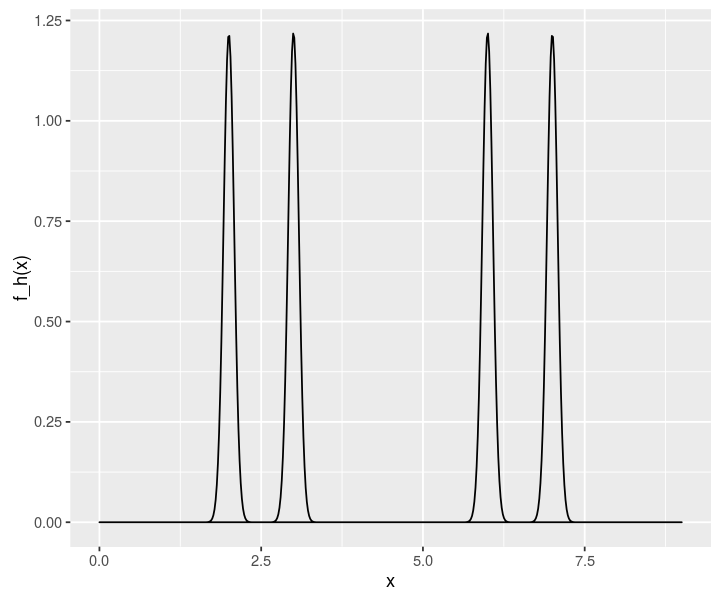

In [20]:
qplot(x = c(2, 3, 6, 7), y = ..density.., geom = c("density"), kernel = "gaussian", adjust = 0.05, xlab = "x",
ylab = "f_h(x)", xlim = c(0, 9))

Aumentar el valor de `h` aumentando el parámetro `adjust` desplaza las funciones $g_i$, haciendo que se superpongan más:

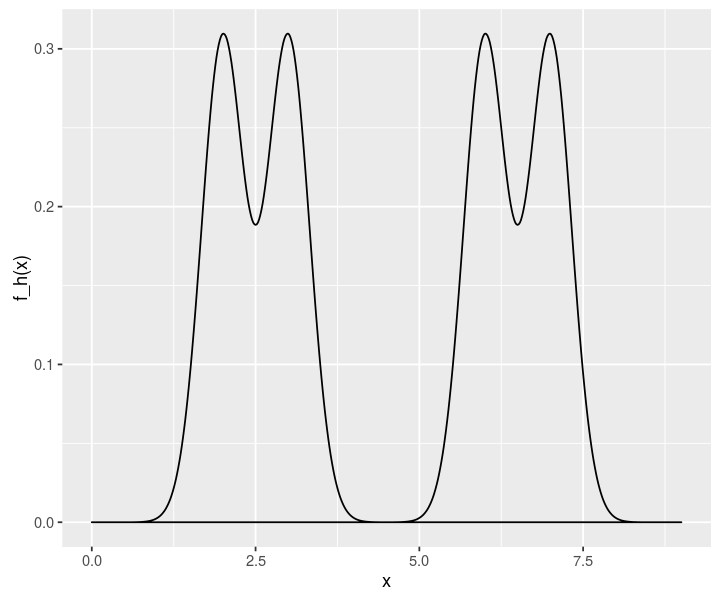

In [21]:
qplot(x = c(2, 3, 6, 7), y = ..density.., geom = c("density"), kernel = "gaussian", adjust = 0.2, xlab = "x",
ylab = "f_h(x)", xlim = c(0, 9))

Aumentar el valor de `h` agrupa además los cuatro picos en dos picos, cada uno responsable de un par correspondiente de puntos cercanos.

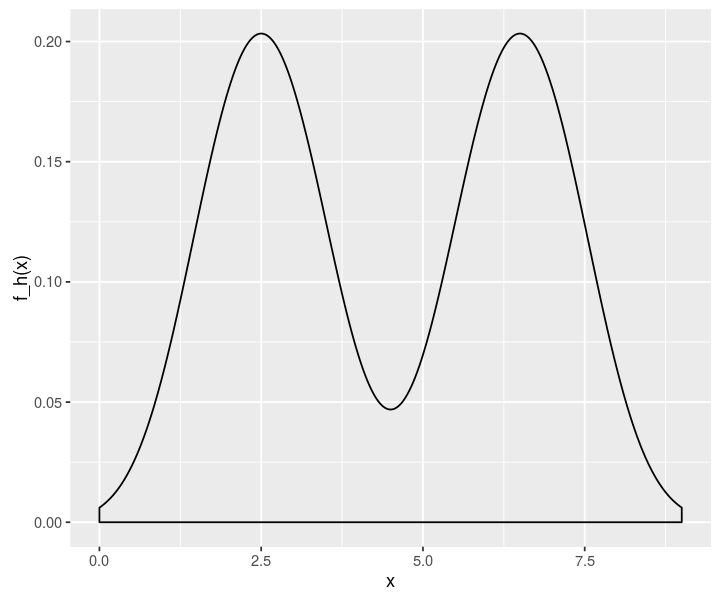

In [22]:
qplot(x = c(2, 3, 6, 7), y = ..density.., geom = c("density"), kernel = "gaussian", adjust = 0.5, xlab = "x",
ylab = "f_h(x)", xlim = c(0, 9))

Finalmente, el aumento adicional del valor de h resulta en funciones casi constantes $g_i$ y una función `f` casi constante. Esto corresponde a un histograma con intervalos muy anchos en los que todos los puntos caen en el mismo intervalo.

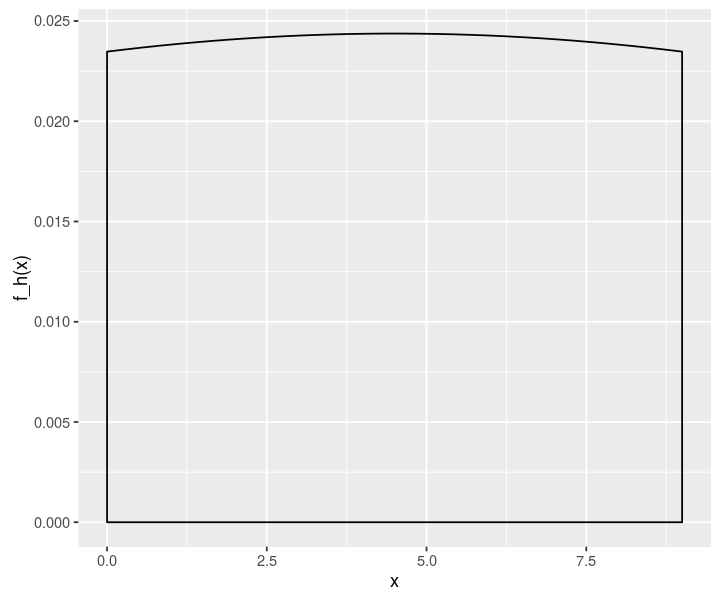

In [23]:
qplot(x = c(2, 3, 6, 7), y = ..density.., geom = c("density"), kernel = "gaussian", adjust = 10, xlab = "x",
ylab = "f_h(x)", xlim = c(0, 9))

La figura de abajo contrasta un histograma con un histograma suavizado usando la función `ggplot`. Para mejorar la visualización hemos hecho el histograma semitransparente usando el argumento `alpha` (toma un valor entre 0 y 1 indicando los niveles de transparencia).

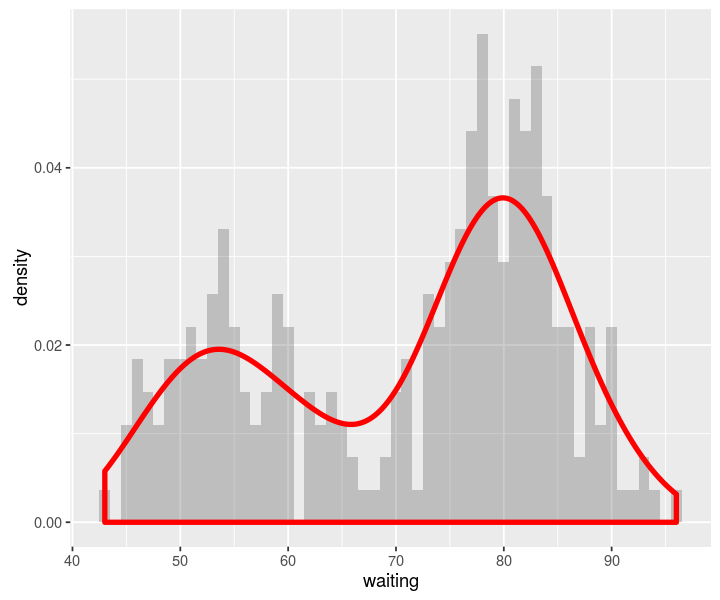

In [24]:
ggplot(faithful, aes(x = waiting, y = ..density..)) + geom_histogram(alpha = 0.3,binwidth = 1) + geom_density(size = 1.5,
color = "red")

### Gráfico de lineas

El paquete `graphics` incluye la función `curve` que muestra funciones matemáticas. En el ejemplo siguiente, la primera línea define una nueva función llamada `sinc` mientras que la segunda línea lo dibuja. Observa el etiquetado automático de los ejes.

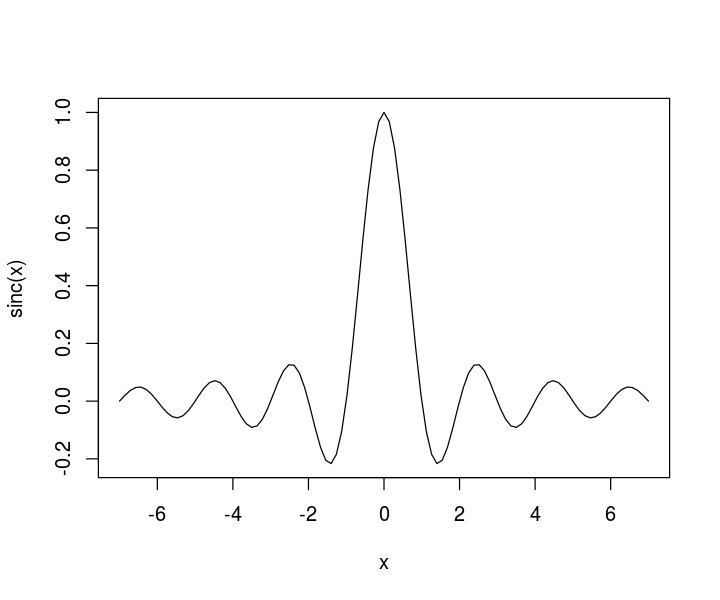

In [25]:
options(repr.plot.width=6, repr.plot.height=5)

sinc = function(x) sin(pi * x)/(pi * x)
curve(sinc, -7, +7)

Otra opción para mostrar un gráfico de línea con el paquete `graphics` es usar la función `plot` pero con un parámetro `type = "l"`, como se muestra a continuación. La variable `lty` nos permite mostrar diferentes tipos de líneas. Demostramos esto en el siguiente ejemplo:

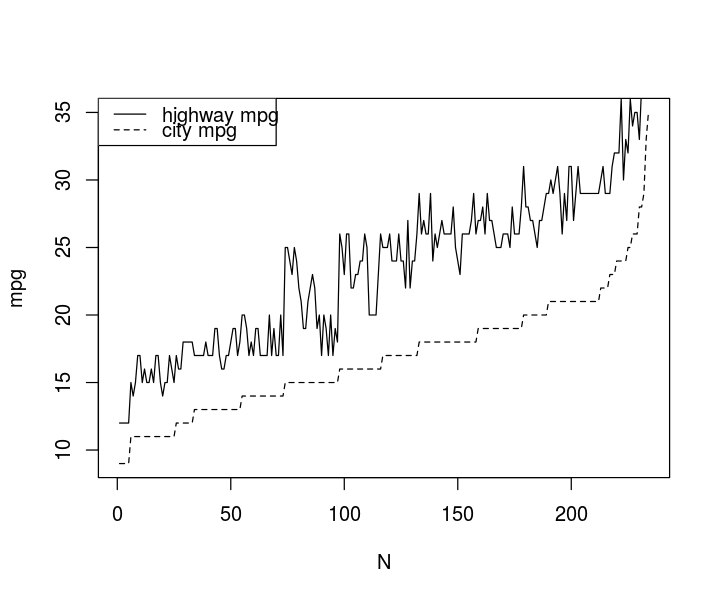

In [26]:
options(repr.plot.width=6, repr.plot.height=5)
#S$x almacena los valores ordenados de city mpg
#S$ix almacena los indices de los valores ordenados


S = sort.int(mpg$cty, index.return = T)
plot(S$x, type = "l", lty = 2, xlab = "N", ylab = "mpg")

# Agregamos una linea  a hwy mpg

lines(mpg$hwy[S$ix], lty = 1) 
legend("topleft", c("highway mpg", "city mpg"),lty = c(1, 2))

Podemos concluir del grafico anterior que : highway mpg tiende a ser más alto que el city mpg y tiende a aumentar a medida que aumenta city mpg.

La función `qplot` crea un gráfico de líneas cuando se pasa un parámetro `geom = line`.

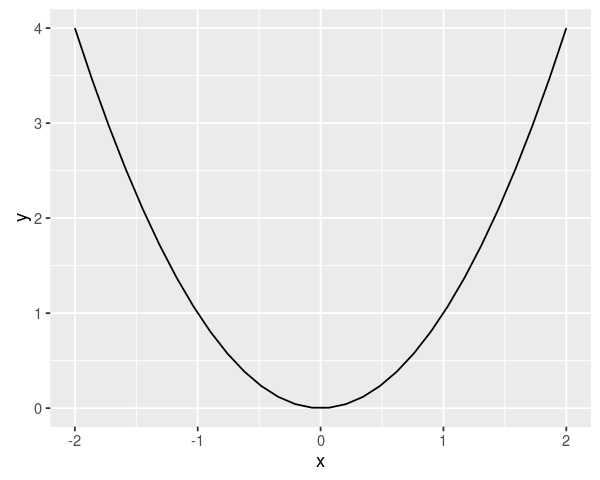

In [27]:
options(repr.plot.width=5, repr.plot.height=4)
x = seq(-2, 2, length.out = 30)
y = x^2
qplot(x, y, geom = "line")

A continuación se muestra un ejemplo similar en el que están presentes múltiples geometrías.

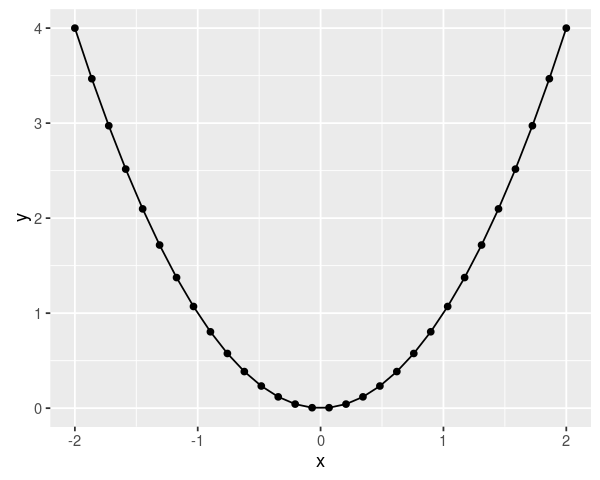

In [28]:
options(repr.plot.width=5, repr.plot.height=4)

print(qplot(x, y, geom = c("point", "line")))

La función `ggplot` crea el misma gráfico añadiendo una capa de geometría de lineas :`geom_line()` usando el operador `+`.

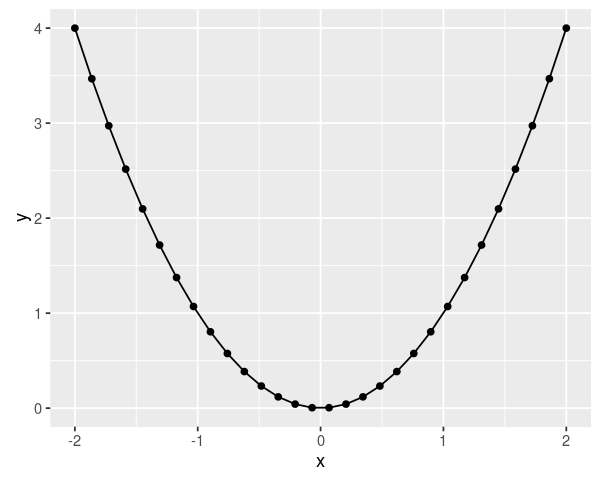

In [29]:
options(repr.plot.width=5, repr.plot.height=4)
# Nuevo data frame con  variables x,y=x^2

D = data.frame(x = x, y = y)
ggplot(D, aes(x = x, y = y)) + geom_line() + geom_point()

### Gráfico de dispersión

Un diagrama de dispersión grafica las relaciones entre dos variables numéricas. Representa cada par de variables como un punto en un espacio bidimensional cuyas coordenadas son los correspondientes valores `x`, `y`.

Para crear un diagrama de dispersión con el paquete `graphics`, usamos `plot ` con dos columnas de un data frame.

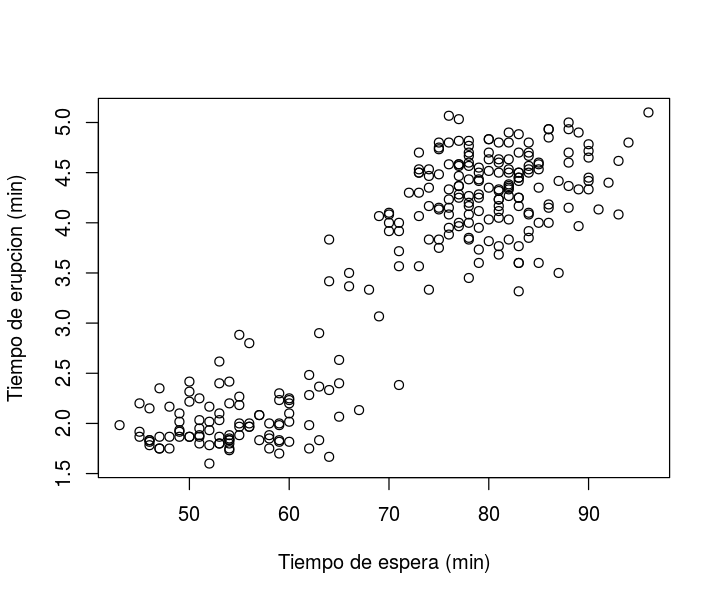

In [30]:
options(repr.plot.width=6, repr.plot.height=5)

plot(faithful$waiting, faithful$eruptions, xlab = "Tiempo de espera (min)", ylab = "Tiempo de erupcion (min)")

Concluimos de los dos grupos en la gráfica de dispersión que hay dos casos distintos: erupciones cortas y erupciones largas. Además, los tiempos de espera para las erupciones cortas son típicamente cortos, mientras que los tiempos de espera para las erupciones largas son típicamente largos. Esto es consistente con nuestra intuición: toma más tiempo construir la presión para una erupción larga que para una erupción corta.

Los puntos anteriores se representan gráficamente utilizando marcadores circulares huecos. Los argumentos `pch`, `col`, `cex` modifican la forma, el color y el tamaño del marcador, respectivamente. Escribe `help(pch)` para obtener más información sobre la configuración de estos valores.

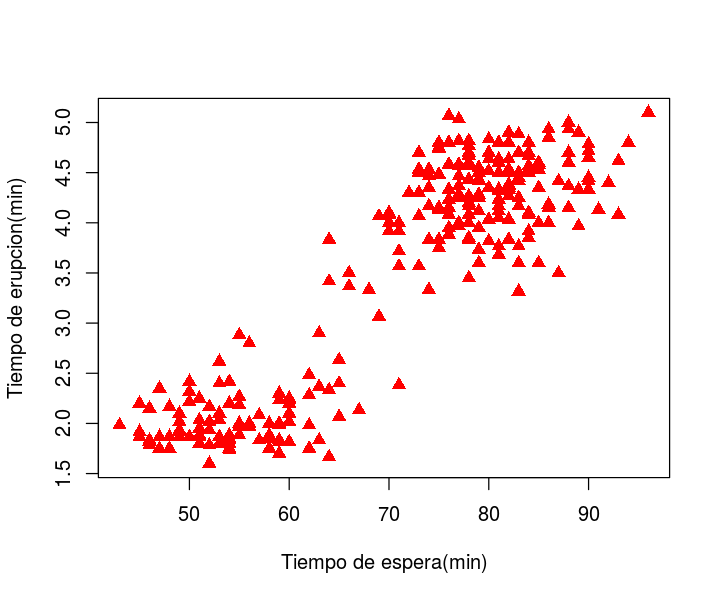

In [31]:
options(repr.plot.width=6, repr.plot.height=5)
plot(faithful$waiting, faithful$eruptions, pch = 17, col = 2, cex = 1.2, xlab = "Tiempo de espera(min)", 
     ylab = "Tiempo de erupcion(min)")

En algunos casos, deseamos trazar un gráfico de dispersión de una columna de un data frame frente a otro, pero distinguimos los puntos basados en el valor de otra columna de un dataframe, normalmente una variable de factor.

Considérese, por ejemplo, la gráfica que se muestra a continuación, que muestra el gráfico `potencia vs. milla por galón` de automóviles dentro del conjunto de datos `mtcars`, pero distingue entre la transmisión automática y manual usando símbolos diferentes. Los tipos de transmisión se codifican a través de la variable `am`, que toma valores 0 o 1 - ambos valores legítimos para el argumento de forma  `pch`.

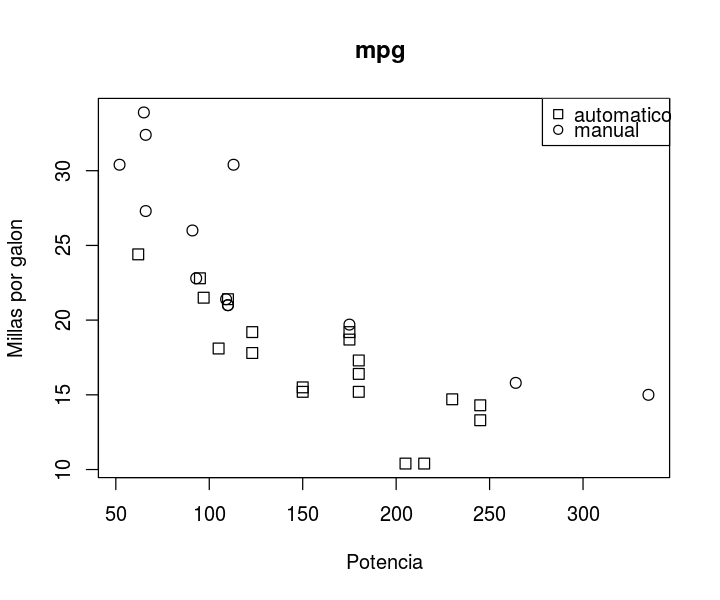

In [32]:
options(repr.plot.width=6, repr.plot.height=5)
plot(mtcars$hp, mtcars$mpg, pch = mtcars$am, xlab = "Potencia", cex = 1.2, ylab = "Millas por galon", 
     main = "mpg ")

#Agregamos una leyenda correspondiendo  a los valores de las variables

legend("topright", c("automatico", "manual"), pch = c(0,
1))

Se extraen varias conclusiones de este gráfico. Primero, hay una relación inversa entre la potencia y el mpg. En segundo lugar, para una cantidad dada de potencia, los coches de transmisión manual son generalmente más eficientes en  combustible. En tercer lugar, los coches con la más alta potencia tienden a ser manuales. En realidad, los dos coches de mayor potencia en el conjunto de datos son Maserati Bora y Ford Pantera, coches con transmisiones manuales.

Para tener  un gráfico de dispersión con `qplot`, escribimos dos parámetros que son las columnas de un data frame asignados a los argumentos `x` e `y`.

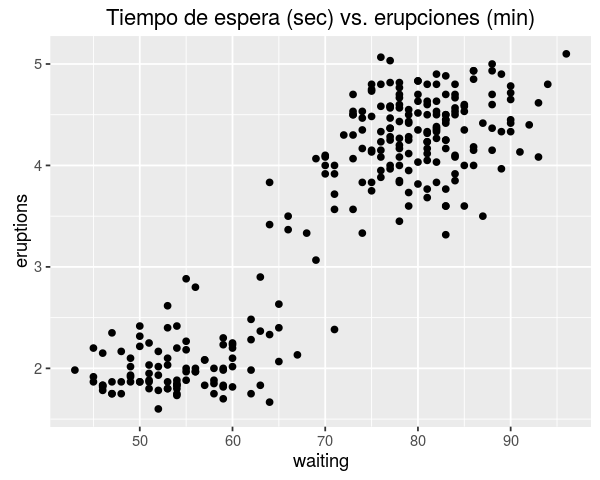

In [33]:
options(repr.plot.width=5, repr.plot.height=4)
qplot(x = waiting, y = eruptions, data = faithful, main = "Tiempo de espera (sec) vs. erupciones (min)")

El siguiente gráfico muestra un diagrama de dispersión del peso de los coche y  el mpg. La primera línea a continuación agrega otra columna de dataframe con un nombre más apropiado (`weight` en contraposición a `wt`) para un etiquetado claro de los ejes. Otra opción es cambiar el nombre de la columna existente utilizando la función `names`.

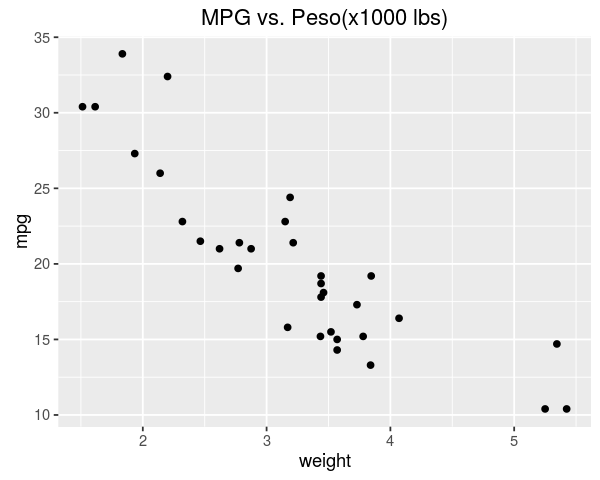

In [34]:
# Para una mayor legibilidad

options(repr.plot.width=5, repr.plot.height=4)
mtcars$weight = mtcars$wt
qplot(x = weight, y = mpg, data = mtcars, main = "MPG vs. Peso(x1000 lbs)")

Concluimos de la figura anterior que existe una tendencia algo lineal con pendiente negativa entre el mpg y  `weight` (aunque esa tendencia disminuye para los coches más pesados).

Denotando el número de cilindros por tamaño usando el argumento `size` nos permite investigar la relación entre las tres cantidades.

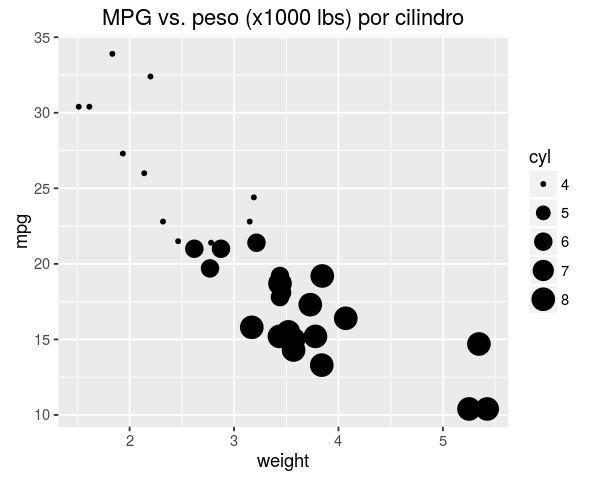

In [35]:
options(repr.plot.width=5, repr.plot.height=4)
qplot(x = weight, y = mpg, data = mtcars, size = cyl, main = "MPG vs. peso (x1000 lbs) por cilindro")

Concluimos de la figura que los automóviles con más cilindros tienden a tener mayor peso y menor eficiencia de combustible. Alternativamente, se puede usar  `color` para codificar el número de cilindros usando el  argumento `color`.

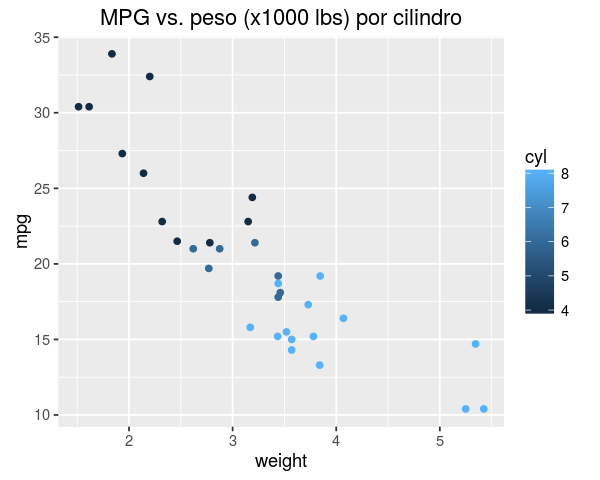

In [36]:
options(repr.plot.width=5, repr.plot.height=4)
qplot(x = weight, y = mpg, data = mtcars, color = cyl, main = "MPG vs. peso (x1000 lbs) por cilindro")

En muchos casos, los datos contienen una gran cantidad de ruido y la representación gráfica puede enfocar la atención  en el ruido mientras ocultan tendencias generales importantes. Una técnica para abordar esta cuestión es añadir una curva de línea suavizada $y_S$, que es un promedio ponderado de los datos originales $(y^{(i)}, x^{(i)})\ i = 1,\dots, n$:

$$
y_S(x) = \sum_{i=1}^{n}\frac{K_h(x -x^{(i)})}{\sum_{i =1}^nK_h(x - x^{(i)})}y^{(i)}.
$$

En otras palabras, $y_S(x)$ es un promedio de los valores de $y^{(i)}$, ponderados de una manera que enfatiza los valores $y^(i)$, cuyos correspondientes valores $x^{(i)}$ son cercanos a $x$. El denominador en la definición de $y_S$ asegura que los pesos que definen la suma media ponderada, valga 1.

Demostremos el diagrama de dispersión suavizado con varios gráficos. Los dos primeros gráficos exploran diferentes valores de `h`, el parámetro que influye en la extensión o anchura de las funciones $K_h(x, x^{(i)})$. Para ajustar `h`, modificamos el argumento `span` que tiene un papel similar al parámetro `adjust` en la discusión del histograma suavizado anterior.

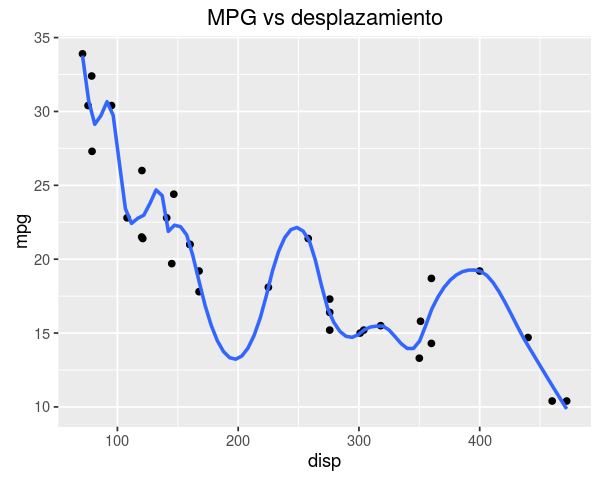

In [37]:
ggplot(mtcars, aes(disp, mpg)) +
  geom_point() +
  geom_smooth(method = "loess",span = 0.2,  se = FALSE)+
  labs(title="MPG vs desplazamiento",
      x = 'disp',
      y = 'mpg')

Aumenta el valor del parámetro `span` aumenta `h`, lo que resulta en funciones $g_i$ más amplias y una curva menos ondulada.

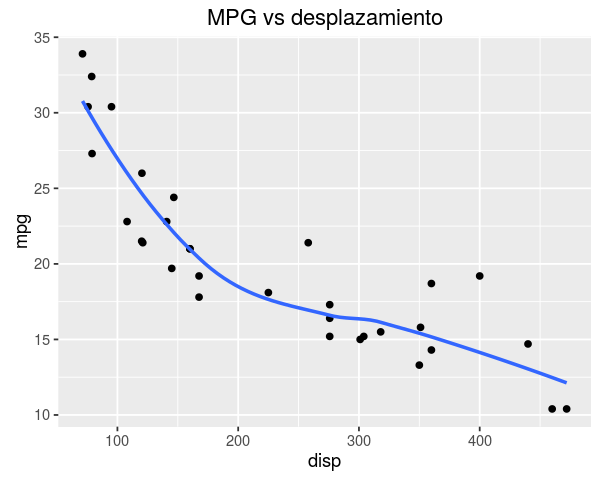

In [38]:
ggplot(mtcars, aes(disp, mpg)) +
  geom_point() +
  geom_smooth(method = "loess",span = 1,  se = FALSE)+
  labs(title="MPG vs desplazamiento",
      x = 'disp',
      y = 'mpg')

Seleccionando un mayor del paramétro resulta en un  `h` aún más grande que resulta en una línea que tiende a ser constante.

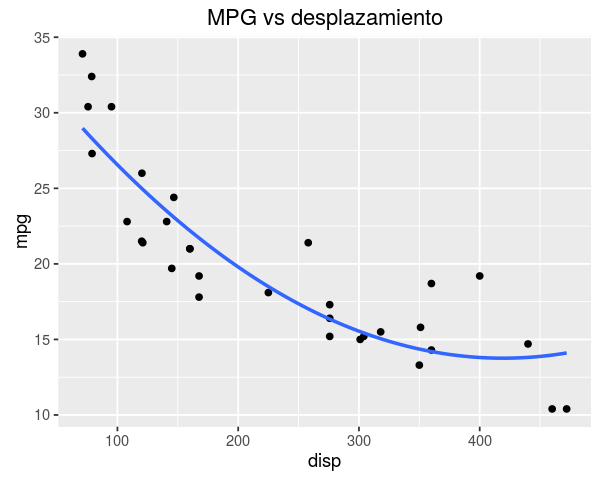

In [39]:
ggplot(mtcars, aes(disp, mpg)) +
  geom_point() +
  geom_smooth(method = "loess",span = 100,  se = FALSE)+
  labs(title="MPG vs desplazamiento",
      x = 'disp',
      y = 'mpg')

Podemos concluir del gráfico anterior que el `mpg` disminuye a medida que aumenta el volumen del desplazamiento del motor. La tendencia es no lineal con una pendiente que cambia de la siguiente manera: primero tenemos una pequeña pendiente, luego una pendiente grande y luego pequeña pendiente nuevamente (en valor absoluto). Esta información es fácilmente disponible a partir del suavizado $y_S$, pero no es fácil de obtener  a partir de los datos del diagrama de dispersión original.

En algunos casos queremos examinar múltiples gráficos con los mismos ejes `x` o `y` en diferentes paneles lado a lado. La función `qplot`  permite esto usando el argumento `facets` que toma una fórmula de la forma `a~b` y crea varias filas y
columnas de paneles (`a`  determina la variable de fila y `b` la variable de columnas).

En el primer ejemplo a continuación se representan dos gráficos  de dispersión lado a lado: `mpg vs.peso para automóviles de transmisión automática` y `coches de transmisión manual`. Se debe tener  en cuenta que los dos paneles están lado a lado ya que el argumento en `facets` es `.~amf`. Los dos paneles comparten las mismas escalas de los ejes, facilitando así la fácil de comparación . Como antes, creamos nuevas columnas de datos con nombres  apropiados para crear un mejor etiquetado de ejes. Otra opción es cambiar los nombres de las columnas existentes utilizando la función `names`.

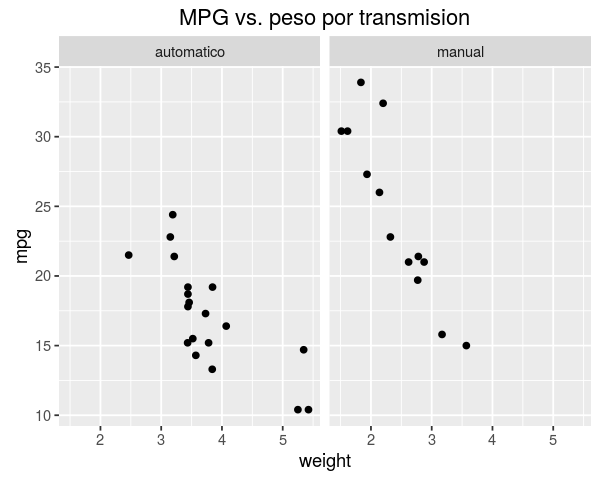

In [40]:
# Agregamos una columna de un data frame con mas 
# nombres apropiados para un etiquetado de los ejes 
# en futuros graficos

mtcars$amf[mtcars$am == 0] = "automatico"
mtcars$amf[mtcars$am == 1] = "manual"
mtcars$vsf[mtcars$vs == 0] = "flat"

mtcars$vsf[mtcars$vs == 1] = "V-shape"
qplot(x = weight, y = mpg, facets = .~ amf, data = mtcars,
main = "MPG vs. peso por transmision")

### Gráficos de Contorno

La manera más conveniente de graficar una función bidimensional `f(x, y)` es representando gráficamente sus contornos de alturas iguales:

$$
z_c = \{ x \in \mathbb{R}, y \in \mathbb{R}: f(x,y) = c \}
$$

para diferentes valores de `c`. Para graficar tal función con el paquete `ggplot2`, cree un data frame con columnas correspondientes a los valores `x`, `y` e `z`. Las columnas `x` e `y` deberían incluir todas las combinaciones posibles de las dos coordenadas sobre una determinada cuadrícula. A continuación, utilizamos  `ggplot` y agregamos la capa `stat_contour`.

In [41]:
x = seq(-1, 1, length.out = 100)
y = x
# creamos un  dataframe conteniendo todas las posibles  
# combinaciones de  x e y

R = expand.grid(x, y)

# numero de filas es 100 x 100 - uno por cada 
# combinacion
dim(R)

[1] 10000     2

In [42]:
# modificamos los nombres de las columnas etiquetando los ejes

names(R) = c("x", "y")
R$z = R$x^2 + R$y^2
head(R)

x,y,z
-1.0000000,-1,2.000000
-0.9797980,-1,1.960004
-0.9595960,-1,1.920824
-0.9393939,-1,1.882461
-0.9191919,-1,1.844914
-0.8989899,-1,1.808183


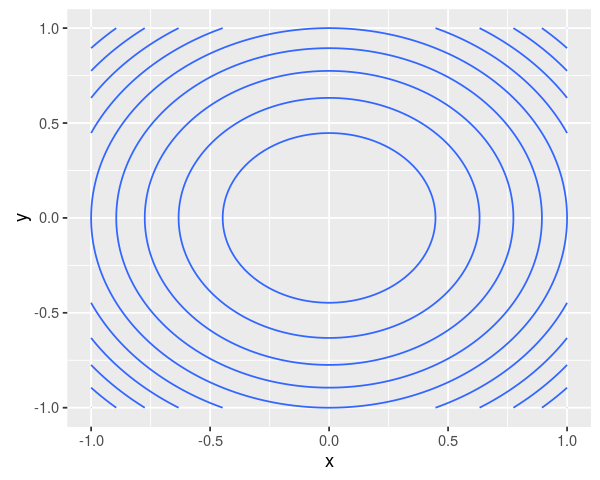

In [43]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(R, aes(x = x, y = y, z = z)) + stat_contour()

### Quantiles y gráficos de cajas

Los histogramas son muy útiles para resumir datos numéricos, que muestran la distribución aproximada de los valores. Una alternativa que se utiliza a menudo junto con el histograma es un grafico o diagrama  de cajas. Para entender un poco acerca de estos diagramas, necesitamos conocer el concepto de `percentil`.

El `r-percentil` de un conjunto de datos numéricos es el punto en el que aproximadamente el `r` por ciento de los datos se encuentran por debajo y aproximadamente el `100-r` por ciento está por encima. Otro nombre para el `r-percentil`  es el cuantil `0.r`. Hay varias definiciones para el concepto de percentil, que se implementa en R.

In [44]:
help(quantile)

In [45]:
# Mostramos de 0 a 100 percentiles en incrementos de 0.1
# para el conjunto de datos que contiene 1,2,3,4. 

quantile(c(1, 2, 3, 4), seq(0, 1, length.out = 11))

0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
 1.0  1.3  1.6  1.9  2.2  2.5  2.8  3.1  3.4  3.7  4.0

La mediana o 50-percentil es el punto en el que la mitad de los datos se encuentra por debajo y la mitad por encima. El 25-percentil y el 75-percentil  son los puntos en los que el `25%` y el `75%` de los datos están por encima, respectivamente. Estos puntos también se llaman el primer y tercer cuartiles (el segundo cuartil es la mediana). El intervalo entre el primero y el tercer cuartil se denomina `intervalo interquartil (IQR)`. Es la región que cubre el `50%`  de los datos.

Un diagrama de  caja está compuesta por una caja, una línea interior bisectando la caja, whiskers que se extienden a ambos lados de la caja, y los valores atípicos o outliers. El cuadro indica el `IQR`, con la línea bisectriz interna que denota la mediana. La mediana puede o no estar en el centro geométrico de la caja, dependiendo de si la distribución de valores es sesgada o simétrica. Los `whiskers` se extienden hasta el punto más extremo no más allá de `1,5` veces la longitud del IQR con respecto  a los bordes de la caja. Los puntos de datos fuera de la caja y el rango de los whiskers se llaman valores atípicos o outliers y se representan como puntos separados. La separación de los valores atípicos de la caja y los whiskers es útil para evitar un punto de vista distorsionado, donde hay unos pocos valores extremos no representativos.

El siguiente código representa un gráfico de caja en `R` con el paquete `ggplot2`. El operador `+` añade la geometría de gráficos de caja, da vuelta las coordenadas `x` e `y` y elimina la etiqueta del eje y.

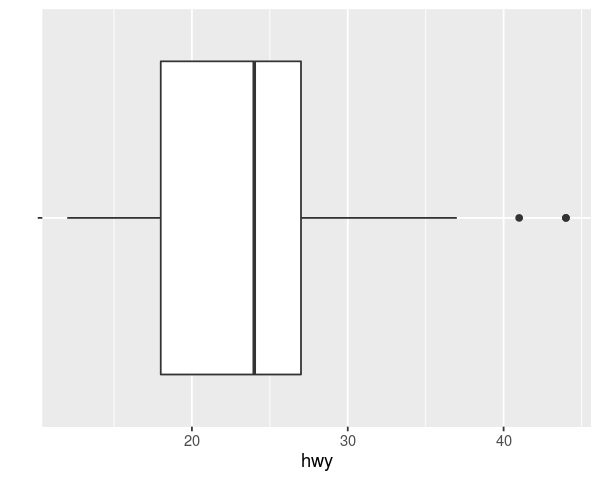

In [46]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(mpg, aes(factor(""), hwy)) + geom_boxplot() + coord_flip() + scale_x_discrete("")

Concluimos de este gráfico que la mediana de `highway mpg` es alrededor de `24`, con el `50%` de los datos que caen dentro de la caja, que se extiende en el rango de `18` a `27`. Hay dos outliers mayores a  40 y los datos restantes se encuentran dentro de los `whiskers` entre 12 y 37. El hecho de que la línea interna está a la derecha de la mitad de la caja indica que la distribución está sesgada a la derecha.

Un gráfico de caja no transmite la naturaleza multimodal de la distribución que muestra el histograma. Por otro lado, es más fácil leer la mediana y el IQR, que muestra el centro y el `50%` de datos  centrales desde el gráfico de  cajas. Es conveniente trazar varios diagramas de cajas una al lado del otro  para comparar datos correspondientes a una variable de factor independiente. 

Demostramos, esto graficando diagramas de cajas de `highway mpg`, para las diferentes clases de vehículos. Volvemos los diagramas de la caja horizontalmente usando `coord_flip()`,  ya que las etiquetas de texto se muestran mejor en este caso.

Ten  en cuenta que reordenar los factores de la variable `class` con el fin de ordenar los diagramas de cajas  en orden creciente las medianas de `highway mpg` . Esto hace que sea más fácil comparar las diferentes poblaciones.

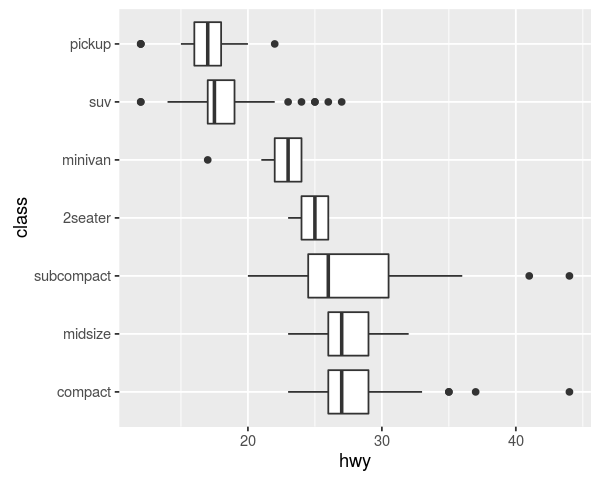

In [47]:
options(repr.plot.width=5, repr.plot.height=4)

ggplot(mpg, aes(reorder(class, -hwy, median), hwy)) + geom_boxplot() + coord_flip() + scale_x_discrete("class")

El gráfico sugiere el siguiente orden de eficiencia de combustible entre las clases de vehículos: `pickups`, `SUV`, `minivans`, `2seaters`, `sub-compacts`, `midsizes` y `compacts`. Las categorías `compacts` y `midsizes` tienen cajas y whiskers casi idénticos, pero la categoría `compact` tiene más valores outliers. La propagación de los coches `subcompact` es sustancialmente más alta que la propagación en todas las demás categorías. También observamos que los `SUV` y los `2seaters` tienen valores casi disjuntos (la caja y los rangos de los whiskers son completamente disjuntos), lo que lleva a la observación de que casi todos los coches `2seaters` en la muestra  tienen un mayor `highway mpg`  que los `SUV`.

## Gráficos Q-Q

Los gráficos cuantil-cuantil  o Q-Q son útiles para comparar dos conjuntos de datos, uno de los cuales se pueden muestrear de una determinada distribución. Son esencialmente gráficos de dispersión de los cuantiles de un conjunto de datos vs los cuantiles del otro conjunto de datos. La forma del diagrama de dispersión implica las siguientes conclusiones (las pruebas son aplicaciones directas de la teoría de la probabilidad).

* Una recta con pendiente 1 que cruza el origen implica que los dos conjuntos de datos tienen quantiles idénticos y por lo tanto  se muestrean a partir de distribuciones idénticas.

* Una recta con pendiente 1 que no pasa por el origen implica que los dos conjuntos de datos tienen distribuciones de forma y propagación  similares, pero que una se desplaza con respecto a la otra.

* Una recta con una pendiente diferente de 1 que no pasa a través del origen implica que los dos conjuntos de datos tienen distribuciones que poseen formas similares pero que una se traslada y se escala con respecto a la otra.

* Una forma S no lineal implica que el conjunto de datos correspondiente al eje x se muestrea a partir de una distribución con cola más ancha que la del otro conjunto de datos.

* Una forma S reflejada no lineal implica que el conjunto de datos cuyos cuantiles corresponden al eje `y` se extraen de una distribución que tiene cola más ancha que la  del otro conjunto de datos.


Para comparar un conjunto de datos, con una distribución, muestreamos los valores de la distribución y luego mostramos los gráficos Q-Q de los dos conjuntos de datos. Los quantiles de la muestra extraída de la distribución se llaman a veces `quantiles teóricos`. Por ejemplo, considere los tres conjuntos de datos muestreados a partir de tres distribuciones gaussianas `N(0, 1)`, `N(0, 1)` y `N(0, 2)`.

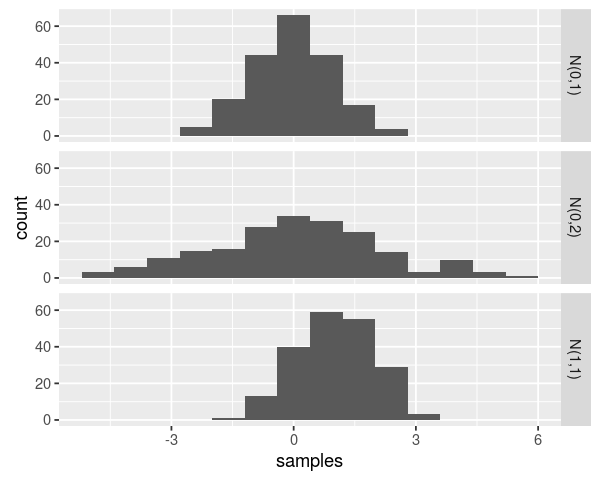

In [48]:
# Histogramas ejemplos

D = data.frame(samples = c(rnorm(200, 1, 1), rnorm(200, 0, 1), rnorm(200, 0, 2)))
D$parameter[1:200] = "N(1,1)"
D$parameter[201:400] = "N(0,1)"
D$parameter[401:600] = "N(0,2)"
qplot(samples, facets = parameter ~ ., geom = "histogram", data = D, binwidth = 0.8)

Calculamos a continuación las gráficos Q-Q de estos tres conjuntos de datos (eje y) y  una muestra extraída de la distribución `N(0, 1)` (eje x).

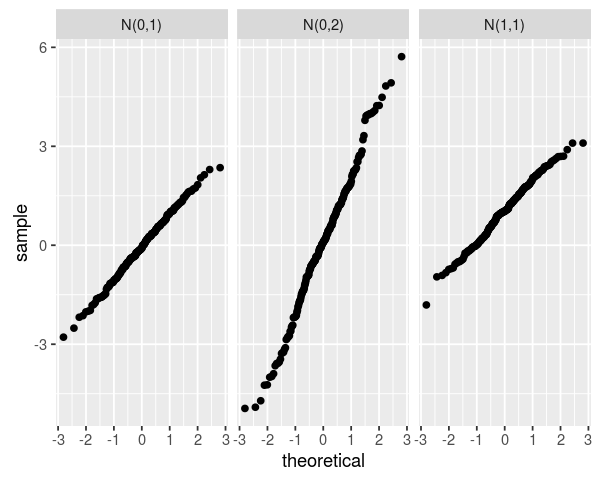

In [49]:
ggplot(D, aes(sample = samples)) + stat_qq() + facet_grid(. ~parameter)

Se debe observar que las tres gráficas son lineales, lo que implica que los tres conjuntos de datos tienen distribuciones similares en forma a la distribución `N(0,1)`, en traslado y escalamiento. En el panel izquierdo tenemos una forma lineal con pendiente `1` que pasa por el origen, ya que los dos conjuntos de datos fueron muestreados de la misma distribución `N(0,1)`. En el panel central se obtiene una línea que pasa por el origen pero con una pendiente más pronunciada, ya que los datos eran más anchos que la distribución `N(0,1)`. En el panel derecho tenemos una línea de pendiente 1 que no pasa por el origen ya que las dos distribuciones tienen una extensión idéntica pero se trasladan  entre sí. 

Como ejemplo final mostramos el gráfico Q-Q de una muestra de una distribución `N(0,1)` con una muestra de una distribución `t` cuyas colas disminuyen polinomialmente en lugar de exponencialmente. Como resultado, las dos distribuciones tienen formas fundamentalmente diferentes y sus quantiles están relacionados no linealmente.

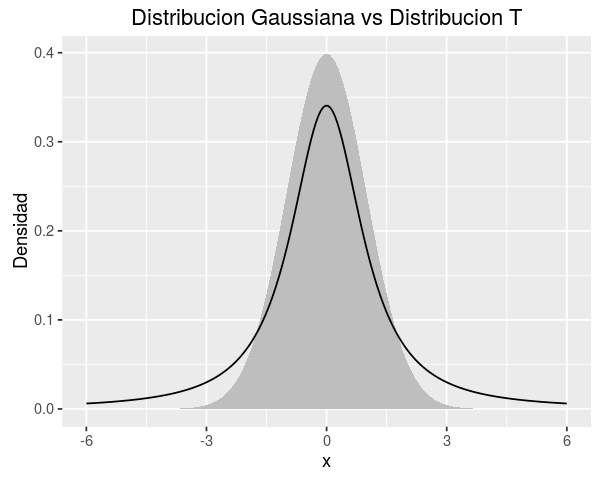

In [50]:
x = seq(-6, 6, length.out = 200)
R = data.frame(density = dnorm(x, 0, 1))
R$tdensity = dt(x, 1.5)
R$x = x
ggplot(R, aes(x = x, y = density)) + geom_area(fill = I("grey")) + geom_line(aes(x = x, y = tdensity)) +
labs(title="Distribucion Gaussiana vs Distribucion T",
         x="x",
         y="Densidad")

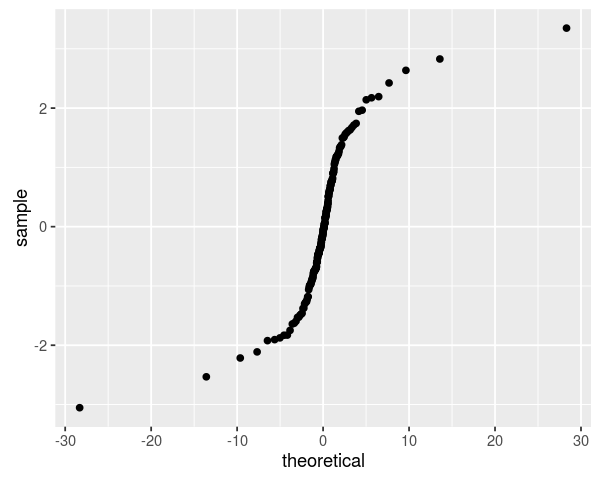

In [51]:
R$samples = rnorm(200, 0, 1)
pm = list(df = 1.5)
ggplot(R, aes(sample = samples)) + stat_qq(distribution = qt, dparams = pm)

## Preparación de datos

Hacemos hincapié en que la gráfica de datos, se realiza  creando primero un data frame con los datos apropiados y los nombres de las  columnas adecuadas y luego utilizando las funciones `plot`, `qplot` o `ggplot`. Este enfoque es mejor que mantener los datos en una matriz sin anotar, representar gráficamente los valores y  a continuación, etiquetar los ejes, las leyendas y los facets de manera adecuada. En los ejemplos anteriores, usualmente comenzamos con un data frame ya hecho, pero en la mayoría de los casos, el dataframe tiene que ser preparado inicialmente.

In [52]:
# Ejemplo

# Usamos stack para crear un data frame

A = list(a = c(1, 2), b = c(3, 4), c = c(5, 6))
A

$a
[1] 1 2

$b
[1] 3 4

$c
[1] 5 6

In [53]:
stack(A)

values,ind
1,a
2,a
3,b
4,b
5,c
6,c


El data frame anterior está listo para la representación gráfica. La primera columna contiene los valores de la variable que se está visualizando y la segunda contiene una variable que se utiliza para distinguir los diferentes gráficos  usando `overlays` o `facets`. El siguiente código proporciona un ejemplo completo.

In [54]:
# Utilizamos un data frame

x = seq(-8, 8, length.out = 100)

# funcion densidad Gaussiana
gf = function(x, s) exp(-x^2/(2 * s^2))/(sqrt(2 *pi) * s)
R = stack(list('sigma=1' = gf(x, 1), 'sigma=2' = gf(x,2), 'sigma=3' = gf(x, 3), 'sigma=4' = gf(x,4)))
head(R)

values,ind
5.052271e-15,sigma=1
1.816883e-14,sigma=1
6.365366e-14,sigma=1
2.172582e-13,sigma=1
7.224128e-13,sigma=1
2.340189e-12,sigma=1


In [55]:
# Reciclamos x, cuatro veces

names(R) = c("y", "sigma")
head(R)

y,sigma
5.052271e-15,sigma=1
1.816883e-14,sigma=1
6.365366e-14,sigma=1
2.172582e-13,sigma=1
7.224128e-13,sigma=1
2.340189e-12,sigma=1


In [56]:
R$x = x
head(R)

y,sigma,x
5.052271e-15,sigma=1,-8.000000
1.816883e-14,sigma=1,-7.838384
6.365366e-14,sigma=1,-7.676768
2.172582e-13,sigma=1,-7.515152
7.224128e-13,sigma=1,-7.353535
2.340189e-12,sigma=1,-7.191919


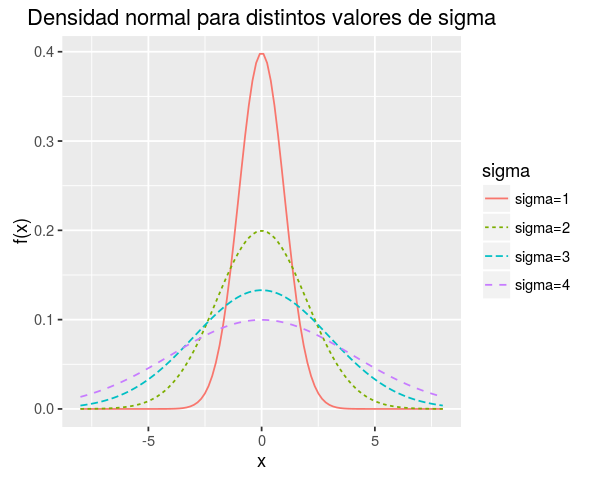

In [57]:
qplot(x, y, color = sigma, lty = sigma, geom = "line",
data = R, main = "Densidad normal para distintos valores de sigma",
xlab = "x", ylab = "f(x)")